# Wifi RSS Localization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

###### Data Set

In [0]:
train = pd.read_csv('TrainingData.csv', header = 0)

In [0]:
# informations sur les données
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [0]:
train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [0]:
# s'assurer qu'aucune donnée est null
train.isnull().any()

WAP001              False
WAP002              False
WAP003              False
WAP004              False
WAP005              False
                    ...  
SPACEID             False
RELATIVEPOSITION    False
USERID              False
PHONEID             False
TIMESTAMP           False
Length: 529, dtype: bool

In [0]:
lastindice = train.iloc[:, 520:529]
lastindice.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LONGITUDE,19937.0,-7.464276e+03,123.402010,-7.691338e+03,-7.594737e+03,-7.423061e+03,-7.359193e+03,-7.300819e+03
LATITUDE,19937.0,4.864871e+06,66.933183,4.864746e+06,4.864821e+06,4.864852e+06,4.864930e+06,4.865017e+06
FLOOR,19937.0,1.674575e+00,1.223078,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
BUILDINGID,19937.0,1.212820e+00,0.833139,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
SPACEID,19937.0,1.484300e+02,58.342106,1.000000e+00,1.100000e+02,1.290000e+02,2.070000e+02,2.540000e+02
RELATIVEPOSITION,19937.0,1.833024e+00,0.372964,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
USERID,19937.0,9.068014e+00,4.988720,1.000000e+00,5.000000e+00,1.100000e+01,1.300000e+01,1.800000e+01
PHONEID,19937.0,1.302187e+01,5.362410,1.000000e+00,8.000000e+00,1.300000e+01,1.400000e+01,2.400000e+01
TIMESTAMP,19937.0,1.371421e+09,557205.399312,1.369909e+09,1.371056e+09,1.371716e+09,1.371721e+09,1.371738e+09


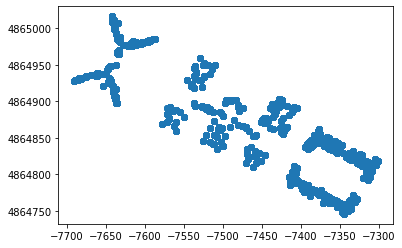

In [0]:
# afficher les données réelles recoltées
plt.scatter(train['LONGITUDE'], train['LATITUDE'])

###### Histograms

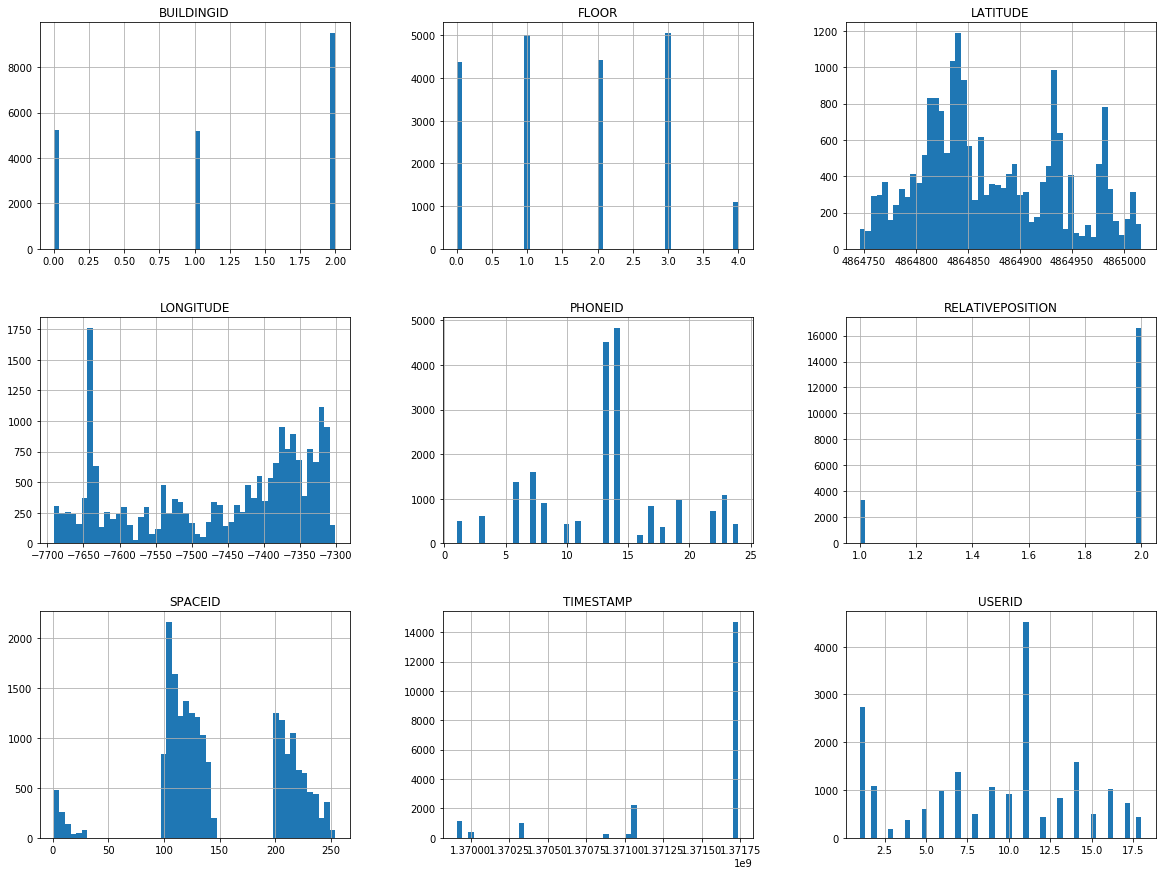

In [0]:
train.iloc[:, 520:529].hist(bins=50, figsize=(20,15))
plt.show()

# Pretraitements

In [0]:
# une copie des données d'entrainnement
trainingDF = train.copy(deep=True)

In [0]:
# puisqu'il ya 3 batiment on ne va utiliser que le premier id = 0

trainingDF_B0 = trainingDF[trainingDF['BUILDINGID'] == 0]

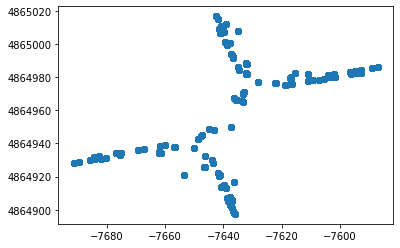

In [0]:
plt.scatter(trainingDF_B0['LONGITUDE'], trainingDF_B0['LATITUDE'])

In [0]:
# Créer un unique ID pour chaque position dans le building 0
# Combinaison de floor, relativeposition, spaceid

trainingDF_B0['u_id'] = trainingDF_B0['FLOOR'].map(str) + trainingDF_B0['SPACEID'].map(str) + trainingDF_B0['RELATIVEPOSITION'].map(str)

C:\Users\Massinissa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
trainingDF_B0.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,u_id
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,01222
7119,100,100,100,100,100,100,100,100,100,100,...,-7637.2570,4.864950e+06,0,0,102,2,11,13,1369908951,01022
7120,100,100,100,100,100,100,100,100,100,100,...,-7628.1345,4.864977e+06,0,0,110,2,11,13,1369909107,01102
7121,100,100,100,100,100,100,100,100,100,100,...,-7622.0546,4.864976e+06,0,0,111,2,11,13,1369909166,01112
7122,100,100,100,100,100,100,100,100,100,100,...,-7636.2057,4.864967e+06,0,0,107,2,11,13,1369909011,01072


In [0]:
print("nombre de position total :",trainingDF_B0['u_id'].count())
print(trainingDF_B0['u_id'].value_counts())

nombre de position total : 5249
01202    42
22312    30
32012    30
32222    30
32362    30
         ..
01072    10
22141    10
02262    10
11372    10
21281     9
Name: u_id, Length: 259, dtype: int64


In [0]:
# Supprimer les colonnes inutiles pour la prediction
# Longitude, latitude, floor, buildingid, spaceid, relativeposition,, userid, phoneid, timestamp

trainingDF_B0.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 
                    'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1, inplace=True)

In [0]:
trainingDF_B0.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,u_id
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,01222
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,01022
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,01102
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,01112
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,01072


###### u_id etant généré comme une chaine de caractères il faut le convertir pour être reconu

In [0]:
trainingDF_B0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 4 to 18497
Columns: 521 entries, WAP001 to u_id
dtypes: category(1), int64(520)
memory usage: 21.0 MB


In [0]:
trainingDF_B0['u_id'] = pd.Categorical(trainingDF_B0['u_id'])

C:\Users\Massinissa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# sauvegarder le fichier csv
trainingDF_B0.to_csv('trainingDF_B0.csv')

In [0]:
trainingDF_B0 = pd.read_csv('trainingDF_B0.csv', header = 0)

In [0]:
del trainingDF_B0['Unnamed: 0']

In [0]:
trainingDF_B0.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,u_id
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1222
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1022
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1102
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1112
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1072


# Modeles utilisés

In [0]:
# variables pour le Building 0
X = trainingDF_B0.iloc[:, 0:520]
y = trainingDF_B0.iloc[:, -1]

In [0]:
# Departager les données en 80% pour train et 20% pour test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Types d'algorithme utilisé

RF =  RandomForestClassifier(n_estimators=500, max_depth=70)

kNN = KNeighborsClassifier()

Gaussian = GaussianNB()

### Random Forest

In [0]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
RF_pred = RF.predict(X_test)

In [0]:
# evaluation performance 
RF_cm = confusion_matrix(y_test, RF_pred)

In [0]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test, RF_pred)*100)
print()

Accuracy:
 78.19047619047619



### k-Nearest Neighbor

In [0]:
kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
kNN_pred = kNN.predict(X_test)

In [0]:
# evaluation performance 
kNN_cm = confusion_matrix(y_test, kNN_pred)

In [0]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test, kNN_pred)*100)
print()

Accuracy:
 52.476190476190474



### Gaussian Naive Bayes

In [0]:
Gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
Gaussian_pred = Gaussian.predict(X_test)

In [0]:
# evaluation performance 
Gaussian_cm = confusion_matrix(y_test, Gaussian_pred)

In [0]:
# Accuracy
print('Accuracy:\n',accuracy_score(y_test, Gaussian_pred)*100)
print()

Accuracy:
 48.47619047619048



### Meilleur modele:

**Random Forest avec parametres:**

* n_estimators = 500 arbres
* max_depth = 70 profondeur

Accuracy = 78.19% (Building 0)
